In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# Question 2

h = float(input("Enter the height dropped at in meters: "))
vo = 0 # m/s

# h = 1/2*g*t^2 at vo = 0 in the negative direction
# for t -> t = sqrt(2h/g)

g = 9.8 #(m/s^2)
t = np.sqrt(2*h/(g**2))
print("It will take: ", np.round(t,2), "s to hit the ground")

Enter the height dropped at in meters: 100
It will take:  1.44 s to hit the ground


In [115]:
# Question 3

G = 6.67*10**(-11) # m^3/kg*s^2
M = 5.97*10**24 # kg
R = 6371 # km
T = float(input("Enter the time value: "))

h = ((G*M*T**2)/(4*np.pi**2))**(1/3) - R
print("Altitude above the Earth surface at",T,"s equals:",h," m")

# Question parts c & d

# 6643950.62537286 m  @ 90 mins
# 4183069.1021891767 m  @ 45 mins
#The faster geosynchronus orbit, the lower the altitude

# Solving for geosynchronus oribit at 23.93 hrs -> 86148  sec
#  which is 42138391.329895645 m 
# Satellites follow in this GEO in order to be in a "fixed position" above a point on Earth as it moves with the Earth
# It makes a difference that one with a much faster orbit by a factor almost 10x larger. 

Enter the time value: 10
Altitude above the Earth surface at 10.0 s equals: 93916.50097741204  m


In [116]:
# Question 4

mr = 10**4 #kg

# Part A
G = 6.67*10**(-11) # m^3/kg*s^2 Newtonian Grav
me = 5.97219*10**24 #kg Earth Mass
mm = 7.34767309*10**22 # kg Moon Mass
re = 6.371e6 # m Earth Radius
rm = 1.74e6 # m Moon Radius
rem = 3.84e8 # m Earth to Moon radius

# Force of Gravity Earth and Moon Fgrav = G*Mass/radius from center^2 at given pos
# Force on rocket = Force from Earth - Force from Moon where towards moon is in the positive direction
# Formula to determine gravitational force on rocket due to earth and moon

def fg(pos): # Defines a function used to input values into the net force list
    rem = 3.84e8 - pos # m Earth to Moon radius
    fe = (G*me*mr)/(pos + re)**2
    fm = (G*mm*mr)/(rm + rem)**2
    fg = -fe + fm
    return fg

posr = []
fr_net = []
fr_e = []
fr_m = []
unet = []
kenet = []
dr = rem / 10000
r = 0

for i in range(1,10002): #Inputs values into lists
    posr.append(r)
    fr_net.append(fg(r))
    fr_e.append(-(G*me*mr)/(r + re)**2)
    fr_m.append((G*mm*mr)/(rm+(rem-r))**2)
    unet.append(-((G*me*mr)/(r+re) + (G*mm*mr)/(rm+(rem-r))))
    kenet.append((G*me*mr)/(r+re) + (G*mm*mr)/(rm+(rem-r)))
    r = r + dr
        
print(fg(0))
print(fg(rem))


-98139.2607271433
16161.262475238045


Pull towards Earth is in the negative direction


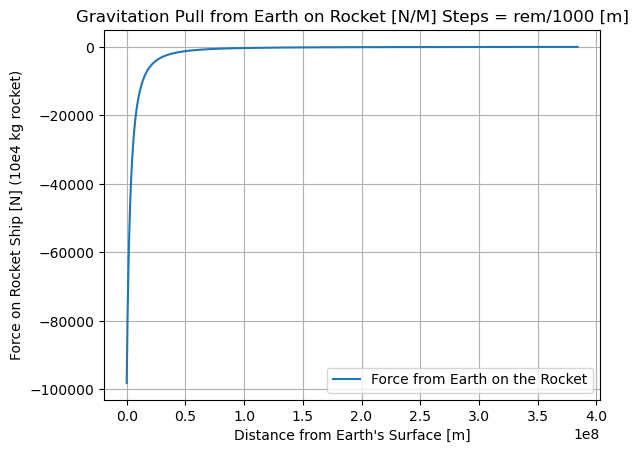

In [117]:
# Shows values of force from the Earth at different positions 
plt.plot(posr,fr_e, label = "Force from Earth on the Rocket")
plt.ylabel("Force on Rocket Ship [N] (10e4 kg rocket)")
plt.xlabel("Distance from Earth's Surface [m]")
plt.title("Gravitation Pull from Earth on Rocket [N/M] Steps = rem/1000 [m]")
plt.grid()
plt.legend()
print("Pull towards Earth is in the negative direction")

Pull towards Moon is in the positive direction


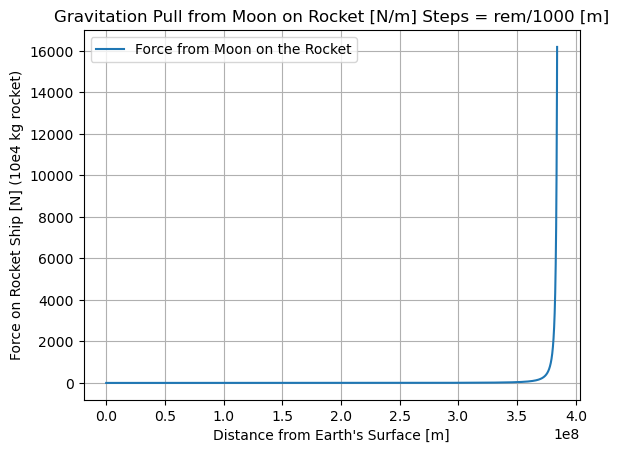

In [118]:
# Shows values of force from the Moon at different positions
plt.plot(posr,fr_m,label = "Force from Moon on the Rocket")
plt.ylabel("Force on Rocket Ship [N] (10e4 kg rocket)")
plt.xlabel("Distance from Earth's Surface [m]")
plt.title("Gravitation Pull from Moon on Rocket [N/m] Steps = rem/1000 [m]")
plt.grid()
plt.legend()
print("Pull towards Moon is in the positive direction")

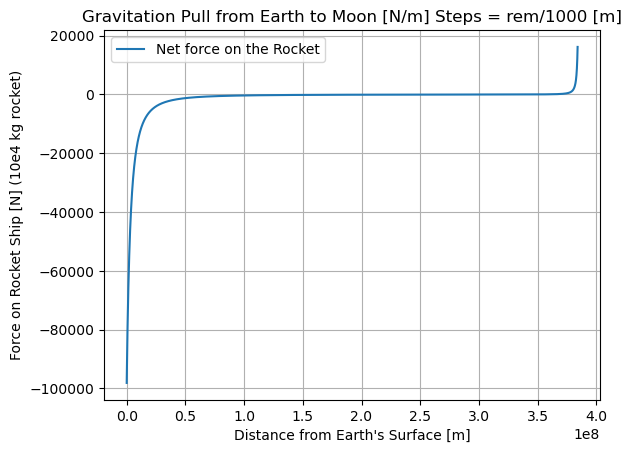

In [119]:
# Shows the net value of the Earth and the Moon
plt.plot(posr,fr_net, label = "Net force on the Rocket")
plt.ylabel("Force on Rocket Ship [N] (10e4 kg rocket)")
plt.xlabel("Distance from Earth's Surface [m]")
plt.title("Gravitation Pull from Earth to Moon [N/m] Steps = rem/1000 [m]")
plt.grid()
plt.legend()

In [120]:
# Blunt way to find index value of max(unet)
for i in range(0, len(unet)):
    nv = unet[i]
    ov = unet[i-1]
#    if (nv > ov):   LOTS OF OUTPUTS, only un-comment if ready 
#        print(i)   
    
print(unet[9026])
print(max(unet))

-12537635702.20124
-12537635702.20124


The Potential Energy at the Point of No Return =  -1.253763570220124e+10 J/m 

 The Point of No Return signifies the point at which no kinetic energy is required to propel the rocket through the potential
 energy imposed by the Earth and coasting begins. Without reaching this point, the rocket will decend back to Earth.


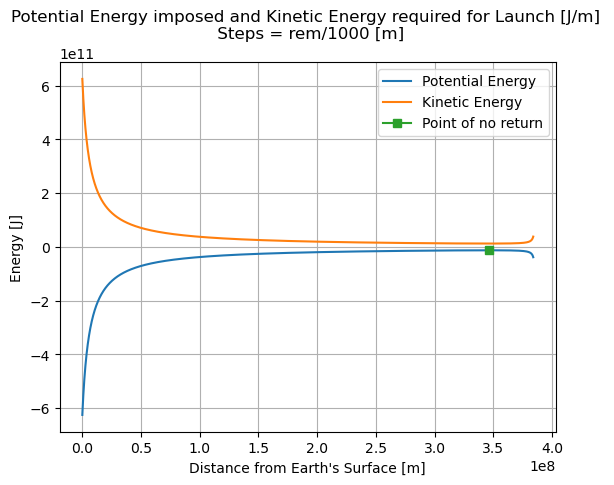

In [121]:
# Plots the Potential Energy imposed and Kinetic Energy required for the Rocket launch  
plt.plot(posr,unet, label = "Potential Energy")
plt.plot(posr,kenet, label = "Kinetic Energy")
plt.ylabel("Energy [J]")
plt.xlabel("Distance from Earth's Surface [m]")
plt.title("Potential Energy imposed and Kinetic Energy required for Launch [J/m] \n Steps = rem/1000 [m]")
pnr = max(unet)
plt.plot(posr[9026],pnr,marker="s", label = 'Point of no return')
plt.legend()
plt.grid()
print("The Potential Energy at the Point of No Return = ",np.format_float_scientific(pnr), "J/m \n\n", 
     "The Point of No Return signifies the point at which no kinetic energy is required to propel the rocket through the potential\n",
     "energy imposed by the Earth and coasting begins. Without reaching this point, the rocket will decend back to Earth.")